# Stock Market Prediction

## Overview

The goal of this project

## Business Understanding

The prediction problem of stock market

## Data Understanding

Data Collection by API

### Import Packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import time
import itertools
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import pickle

# import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import yfinance as yf

sns.set_style('darkgrid')
#import geopandas as gpd
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import register_matplotlib_converters
# display preferences
register_matplotlib_converters()

### Coronavirus API

https://iexcloud.io

In [23]:
#url ='https://cloud.iexapis.com/stable/stock/{}/chart/5y?token={}'.format(symbol, token)
url = 'https://cloud.iexapis.com/stock/aapl/batch'

random = np.random.uniform(0, 1, 501)
# time.sleep(random[i])
params = {  
            #'source': 'csbs',
            #'country_code': 'US',           
            #'timelines': 1
          }

response = requests.get(url, params)
d = response.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [12]:
d['']

[{'url': 'http://api.iextrading.com/1.0',
  'variables': {'protocol': {'default': 'https', 'enum': ['https']}}}]

In [27]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

,Dividends,Stock Splits
Date,,
2014-03-27,0.0,2.002000
2015-04-27,0.0,1.002746


In [31]:
msft = yf.Ticker("MSFT")
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2019-11-20    0.51
2020-02-19    0.51
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
Name: Dividends, Length: 68, dtype: float64

In [32]:
msft.options

('2021-02-12',
 '2021-02-19',
 '2021-02-26',
 '2021-03-05',
 '2021-03-12',
 '2021-03-19',
 '2021-03-26',
 '2021-04-16',
 '2021-06-18',
 '2021-07-16',
 '2021-09-17',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17')

In [4]:
df = yf.download("AAPL", start="2018-01-01", end="2021-02-01")

[*********************100%***********************]  1 of 1 completed


In [77]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.459938,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.429203,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.568691,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.876030,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.131361,134247600
...,...,...,...,...,...,...
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.706757,157611700
2021-01-26,143.600006,144.300003,141.369995,143.160004,142.946396,98390600
2021-01-27,143.429993,144.300003,140.410004,142.059998,141.848038,140843800


In [47]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [79]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2021-01-15', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-25', '2021-01-26', '2021-01-27',
               '2021-01-28', '2021-01-29'],
              dtype='datetime64[ns]', name='Date', length=1026, freq=None)

## Data Preparation

### Exploratory Data Analysis

Text(0.5, 1.0, 'close')

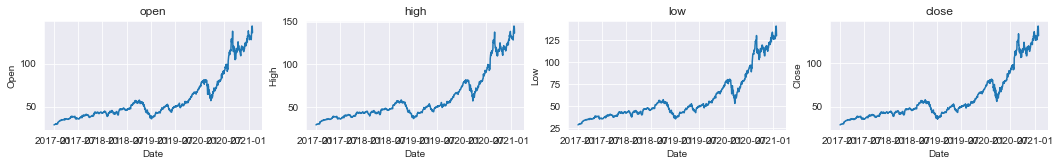

In [51]:
# plot target variables
fig, ax = plt.subplots(1, 4, figsize=(18,2))
sns.lineplot(data=df.Open, ax=ax[0])
ax[0].set_title('open')
sns.lineplot(data=df.High, ax=ax[1])
ax[1].set_title('high')
sns.lineplot(data=df.Low, ax=ax[2])
ax[2].set_title('low')
sns.lineplot(data=df.Close, ax=ax[3])
ax[3].set_title('close')
# plt.subplots_adjust(hspace = 0.5)

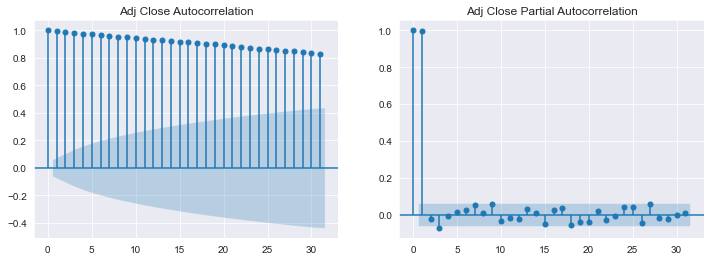

In [56]:
# Plot deaths ACF & PACF
fig, ax = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df['Adj Close'], title='Adj Close Autocorrelation', ax=ax[0]);
plot_pacf(df['Adj Close'], title='Adj Close Partial Autocorrelation', ax=ax[1]);
#plt.savefig('images/acf.jpeg', format='jpeg')

In [46]:
close = df.Close.resample('W').mean()

In [66]:
df.Close[:10]

Date
2018-01-02    43.064999
2018-01-03    43.057499
2018-01-04    43.257500
2018-01-05    43.750000
2018-01-08    43.587502
2018-01-09    43.582500
2018-01-10    43.572498
2018-01-11    43.820000
2018-01-12    44.272499
2018-01-16    44.047501
Name: Close, dtype: float64

In [67]:
close

Date
2018-01-07     43.282499
2018-01-14     43.767000
2018-01-21     44.563126
2018-01-28     43.543999
2018-02-04     41.532000
                 ...    
2021-01-03    134.492500
2021-01-10    129.998000
2021-01-17    128.944000
2021-01-24    133.950001
2021-01-31    139.438000
Freq: W-SUN, Name: Close, Length: 161, dtype: float64

### Dickey-Fuller Test

In [57]:
def stationarity_check(TS):       
    # Perform the Dickey Fuller test
    dftest = adfuller(TS)     
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=7, center=False).mean()
    roll_std = TS.rolling(window=7, center=False).std()    
    # Plot rolling statistics:
    #fig = plt.figure(figsize=(12,6))
    orig = sns.lineplot(data=TS, palette=['blue'],label='Original')
    mean = sns.lineplot(data=roll_mean, palette=['red'], label='Rolling Mean')
    std = sns.lineplot(data=roll_std, palette=['black'], label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])                   
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [48]:
# Apply seasonal_decompose()
decomposition = seasonal_decompose(df.Close.resample('W').mean())
# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

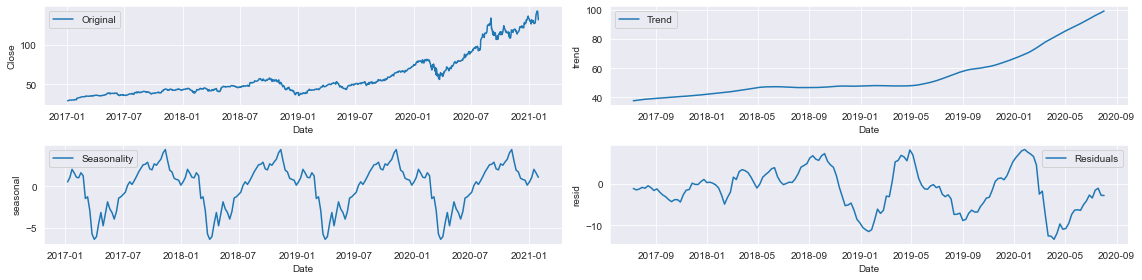

In [49]:
# Plot gathered statistics
fig, ax = plt.subplots(2, 2, figsize=(16,4))
sns.lineplot(data=df.Close, label='Original', ax=ax[0][0])
sns.lineplot(data=trend, label='Trend', ax=ax[0][1])
sns.lineplot(data=seasonal,label='Seasonality', ax=ax[1][0])
sns.lineplot(data=residual, label='Residuals', ax=ax[1][1])
plt.tight_layout()

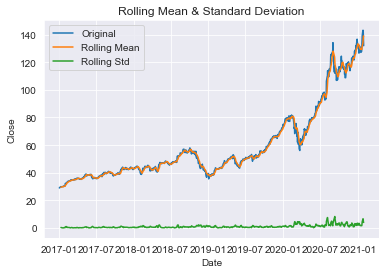

Results of Dickey-Fuller Test: 

Test Statistic                    0.977604
p-value                           0.994024
#Lags Used                       22.000000
Number of Observations Used    1003.000000
Critical Value (1%)              -3.436887
Critical Value (5%)              -2.864426
Critical Value (10%)             -2.568307
dtype: float64


In [87]:
stationarity_check(df.Close)

## Modeling

### SARIMAX

In [6]:
import statsmodels.api as sm

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in pdq]

In [8]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Close,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue

In [9]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           2968.95
Name: 59, dtype: object

In [48]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(close, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.0817,0.271,0.302,0.763,-0.449,0.612
ma.L1,0.1754,0.254,0.692,0.489,-0.321,0.672
ar.S.L12,-0.2877,0.124,-2.312,0.021,-0.531,-0.044
ma.S.L12,-1.2677,0.179,-7.081,0.000,-1.619,-0.917
sigma2,5.3672,1.326,4.047,0.000,2.768,7.967


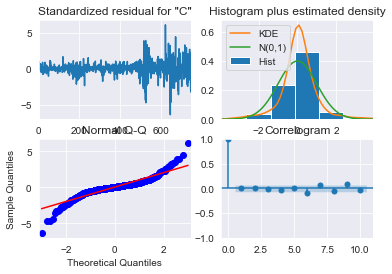

In [11]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics()
plt.show()

In [53]:
# Get predictions for training set and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2020-01-05'), dynamic=False)
pred_conf = pred.conf_int()

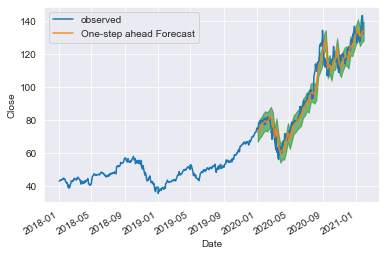

In [54]:
# Plot real vs predicted values along with confidence interval
# Plot observed values
ax = df.Close['2018':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()

In [57]:
# Get the real and predicted values
close_forecasted = pred.predicted_mean
close_truth = close['2020':]

# Compute the mean square error
mse = ((close_forecasted - close_truth) ** 2).mean()
print('The RMSE of our forecasts is {}'.format(round(mse**.5, 2)))

The RMSE of our forecasts is 4.2


In [58]:
# calculate root mean squared error
sarimax_rmse = mean_squared_error(close_truth, close_forecasted, squared=False)
# calculate mean absolute error
sarimax_mae = mean_absolute_error(close_truth, close_forecasted)

print('The RMSE of our forecasts is {}'.format(round(sarimax_rmse, 2)))
print('The MAE of our forecasts is {}'.format(round(sarimax_mae, 2)))

The RMSE of our forecasts is 4.2
The MAE of our forecasts is 3.02


In [59]:
# Get forecast 100 steps ahead in future
prediction = output.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

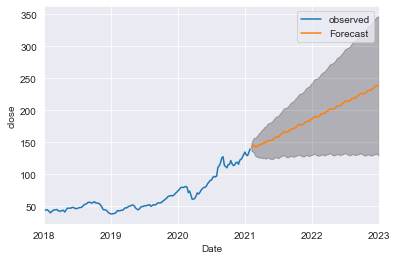

In [60]:
ax = close.plot(label='observed')
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('close')

plt.legend()

## Facebook Prophet

In [240]:
# ts.index.name = 'ds'
# ts = ts.reset_index()
# ts = ts.rename(columns={'timeline': 'y'})

In [119]:
fb_close = pd.DataFrame()
fb_close['y'] = df.Close
fb_close.reset_index(inplace=True)
fb_close.rename(columns={'Date': 'ds'}, inplace=True)

In [120]:
close_train_fb, close_test_fb = fb_close[:-100], fb_close[-100:]

In [121]:
model_close = Prophet(interval_width=0.95)
model_close.fit(close_train_fb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [123]:
future_dates = model_close.make_future_dataframe(periods=100, freq='D')
forecast_close = model_close.predict(future_dates)
forecast_close.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,22.694997,23.086766,33.311547,22.694997,22.694997,5.671616,5.671616,5.671616,-1.119704,-1.119704,-1.119704,6.791319,6.791319,6.791319,0.0,0.0,0.0,28.366612
1,2017-01-04,22.990166,23.829725,34.239503,22.990166,22.990166,5.744666,5.744666,5.744666,-0.996940,-0.996940,-0.996940,6.741606,6.741606,6.741606,0.0,0.0,0.0,28.734832
2,2017-01-05,23.285335,23.708962,34.008442,23.285335,23.285335,5.547539,5.547539,5.547539,-1.141924,-1.141924,-1.141924,6.689462,6.689462,6.689462,0.0,0.0,0.0,28.832874
3,2017-01-06,23.580504,24.013964,34.006643,23.580504,23.580504,5.457804,5.457804,5.457804,-1.176416,-1.176416,-1.176416,6.634220,6.634220,6.634220,0.0,0.0,0.0,29.038308
4,2017-01-09,24.466012,24.591822,34.972447,24.466012,24.466012,5.236852,5.236852,5.236852,-1.205301,-1.205301,-1.205301,6.442153,6.442153,6.442153,0.0,0.0,0.0,29.702864


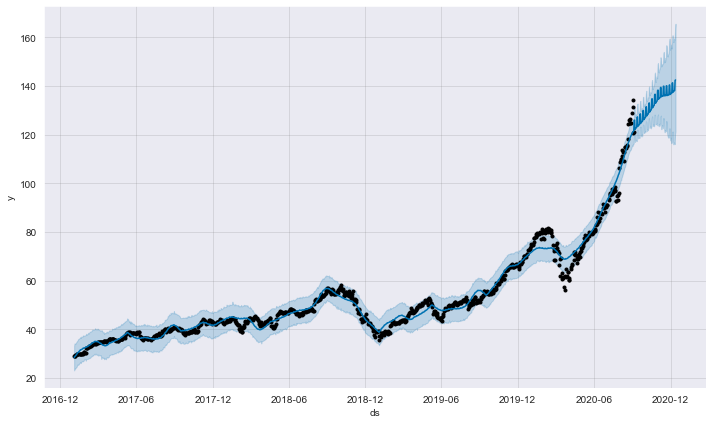

In [124]:
model_close.plot(forecast_close, uncertainty=True);

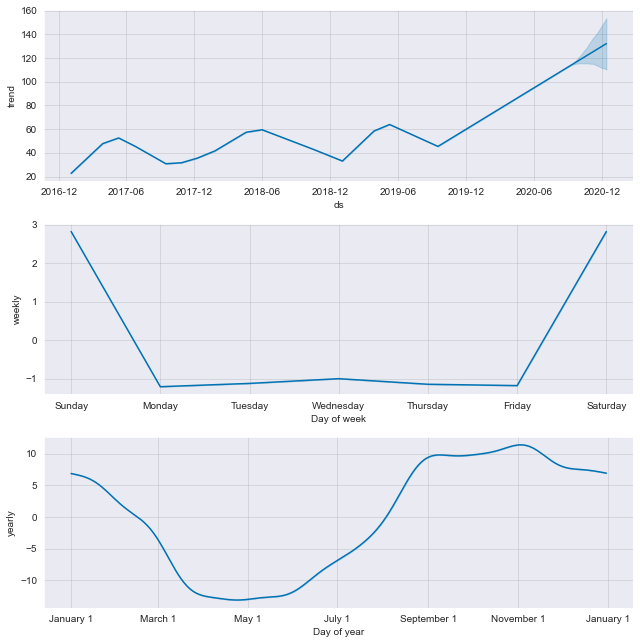

In [125]:
model_close.plot_components(forecast_close);

## LSTM (long short-term memory) Networks

In [126]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [127]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [129]:
df_lstm = pd.DataFrame()
df_lstm['close'] = df.Close

In [130]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_lstm)

In [131]:
train, test = dataset[:-100], dataset[-100:]

In [132]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [133]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [134]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

In [135]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

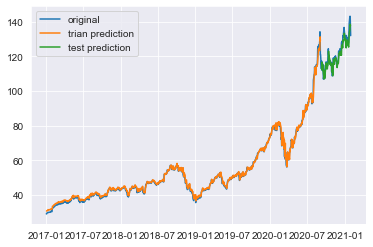

In [136]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(df_lstm.index, scaler.inverse_transform(dataset), label='original')
plt.plot(df_lstm.index, trainPredictPlot,label='trian prediction')
plt.plot(df_lstm.index, testPredictPlot,label='test prediction')
plt.legend()
#plt.savefig('images/lstm.jpeg', format='jpeg')

## Evaluation

### metrics in SARIMAX

In [589]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(sarimax_rmse, 2)))
print('The Mean Absolute Error of our forecasts is {}'.format(round(sarimax_mae, 2)))
print('The Root Mean Squared Error of our dynamic forecasts is {}'.format(round(sarimax_dynamic_rmse, 2)))
print('The Mean Absolute Error of our dynamic forecasts is {}'.format(round(sarimax_dynamic_mae, 2)))

The Root Mean Squared Error of our forecasts is 1456.22
The Mean Absolute Error of our forecasts is 1172.59
The Root Mean Squared Error of our dynamic forecasts is 2102.79
The Mean Absolute Error of our dynamic forecasts is 1731.63


### metrics in Facebook Prophet

In [305]:
# calculate root mean squared error
train_rmse_death_fb = mean_squared_error(death_train_fb['y'], forecast_death['yhat'][:-100], squared=False)
test_rmse_death_fb = mean_squared_error(death_test_fb['y'], forecast_death['yhat'][-100:], squared=False)
print('Facebook Prophet deathIncrease train RMSE: {:.2f}'.format(train_rmse_death_fb))
print('Facebook Prophet deathIncrease test RMSE: {:.2f}'.format(test_rmse_death_fb))
# calculate mean absolute error
train_mae_death_fb = mean_absolute_error(death_train_fb['y'], forecast_death['yhat'][:-100])
test_mae_death_fb = mean_absolute_error(death_test_fb['y'], forecast_death['yhat'][-100:])
print('Facebook Prophet deathIncrease train MAE: {:.2f}'.format(train_mae_death_fb))
print('Facebook Prophet deathIncrease test MAE: {:.2f}'.format(test_mae_death_fb))

Facebook Prophet deathIncrease train RMSE: 432.03
Facebook Prophet deathIncrease test RMSE: 1929.95
Facebook Prophet deathIncrease train MAE: 321.32
Facebook Prophet deathIncrease test MAE: 1579.82


In [469]:
# calculate root mean squared error
train_rmse_mortality_fb = mean_squared_error(mortality_train_fb['y'], forecast_mortality['yhat'][:-100], squared=False)
test_rmse_mortality_fb = mean_squared_error(mortality_test_fb['y'], forecast_mortality['yhat'][-100:], squared=False)
print('Facebook Prophet mortality train RMSE: {:.4f}'.format(train_rmse_mortality_fb))
print('Facebook Prophet mortality test RMSE: {:.4f}'.format(test_rmse_mortality_fb))
# calculate mean absolute error
train_mae_mortality_fb = mean_absolute_error(mortality_train_fb['y'], forecast_mortality['yhat'][:-100])
test_mae_mortality_fb = mean_absolute_error(mortality_test_fb['y'], forecast_mortality['yhat'][-100:])
print('Facebook Prophet mortality train MAE: {:.4f}'.format(train_mae_mortality_fb))
print('Facebook Prophet mortality test MAE: {:.4f}'.format(test_mae_mortality_fb))

Facebook Prophet mortality train RMSE: 0.0848
Facebook Prophet mortality test RMSE: 0.0173
Facebook Prophet mortality train MAE: 0.0277
Facebook Prophet mortality test MAE: 0.0150


### metrics in LSTM Networks

In [137]:
# calculate root mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0], squared=False)
testScore = mean_squared_error(testY[0], testPredict[:,0], squared=False)
print('LSTM Networks close train RMSE: {:.2f}'.format(trainScore))
print('LSTM Networks close test RMSE: {:.2f}'.format(testScore))
# calculate mean absolute error
trainScore_mae = mean_absolute_error(trainY[0], trainPredict[:,0])
testScore_mae = mean_absolute_error(testY[0], testPredict[:,0])
print('LSTM Networks close train MAE: {:.2f}'.format(trainScore_mae))
print('LSTM Networks close test MAE: {:.2f}'.format(testScore_mae))

LSTM Networks close train RMSE: 1.36
LSTM Networks close test RMSE: 3.15
LSTM Networks close train MAE: 0.90
LSTM Networks close test MAE: 2.47


## Conclusion